# Land Sea Mask

[Jiwoo Lee](https://github.com/lee1043/) (LLNL), March 2021

In this document, generate land-sea mask using [CDAT](https://cdat.llnl.gov/) in advance to explore equivalent capability in [Xarray](xarray.pydata.org/).

Useful resources:

CDAT
- [CDAT Tutorial for landsea mask](https://cdat.llnl.gov/Jupyter-notebooks/cdat_utilities/Masking_Data_Land-Sea_Advanced/Masking_Data_Land-Sea_Advanced.html)
- [CDAT cdutil source code for landsea mask generation](https://github.com/CDAT/cdutil/blob/314c565bc2e0d2c15d233320dc4c5496a602479a/cdutil/create_landsea_mask.py#L167)

Xarray
- [Build landsea mask using xarray](https://geohackweek.github.io/nDarrays/09-masking/)
- [Apply mask using xarray](https://stackoverflow.com/questions/43036128/applying-a-land-sea-mask-to-netcdf-data-in-python)
- [land sea mask example](https://xmitgcm.readthedocs.io/en/latest/examples.html)

## Example input data

In [2]:
input_file = "demo_data/CMIP5_demo_data/ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc"

## Import libraries

In [3]:
import cdms2
import cdutil

In [4]:
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## CDAT

### Load data

%%time

fc = cdms2.open(input_file)
dc = fc('ts')

In [6]:
dc.shape

(1872, 145, 192)

### Generate land sea mask for a given grid

In [8]:
def estimate_landmask(d):
    print('Estimate landmask')
    n = 1
    sft = cdutil.generateLandSeaMask(d(*(slice(0, 1),) * n)) * 100.0
    sft[:] = sft.filled(100.0)
    d2 = sft
    d2.setAxis(0, d.getAxis(1))
    d2.setAxis(1, d.getAxis(2))
    d2.id = 'sftlf'
    return d2

In [9]:
lf = estimate_landmask(dc)

Estimate landmask


In [10]:
lf.shape

(145, 192)

### Quick plot to show the results

Convert `cdms2.tvariable.TransientVariable` to `xarray.core.dataarray.DataArray` for easy plotting

In [20]:
lat = lf.getLatitude()
lon = lf.getLongitude()
time = dc.getTime()

dc_xr = xr.DataArray(dc, coords=[list(time), list(lat), list(lon)], dims=["time", "lat", "lon"], name=dc.id)
lf_xr = xr.DataArray(lf, coords=[list(lat), list(lon)], dims=["lat", "lon"], name=lf.id)

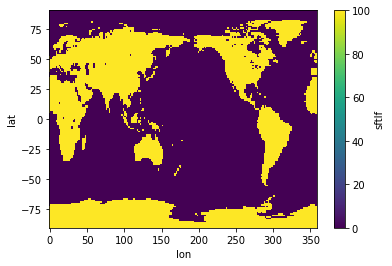

In [21]:
lf_xr.plot()

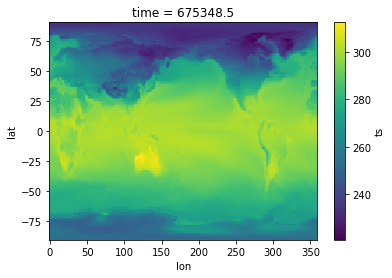

In [23]:
dc_xr[0].plot()

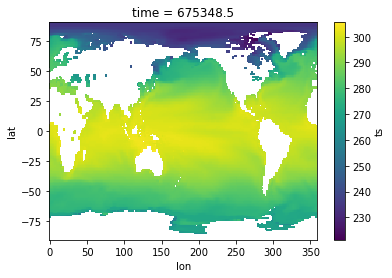

In [24]:
dc_xr[0].where(lf_xr==0).plot()